# Peturbation

### Exercise 1

Taking the deriviative with respect to u of equation (5) in the notes gives:

$$x''_{uu}(F''_{xx}x'_u + F'_{xu}) + F'_{x}x'''_{uuu} + x'_u(F'''_{xxx}x'_{u}x'_{u} + F'''_{xxu}x'_{u} + F''_{xx}x''_{uu} + F'''_{xuu} + F'''_{xux}x'_u) + x''_{uu}(F''_{xx}x'_{u} + F''_{xu}) + x'_u(F'''_{uuu} + F'''_{xux}x'_u) + F''_{xu}x''_{uu} + F'''_{uuu} + F'''_{uux}x'_u = 0$$



Which we could rearrange for $x'''_{uuu}$ with some algebra

### Ex 2

In [1]:
import numpy as np
import scipy
from scipy import optimize as opt
from matplotlib import pyplot as plt

In [2]:
def LD(alpha, w, k, z):
    LD = k*((1-alpha)*z/w)**(1/alpha)
    return LD

In [3]:
def prof(alpha, w, k, z):
    pi = z*(k**alpha)*(LD(alpha, w, k, z))**(1-alpha) - w*LD(alpha, w, k, z)
    return pi

In [4]:
def LS(alpha, w, k, z, h, b, t):
    LS = h - b*(w*h + prof(alpha, w, k, z) - t)/(w*(1+b))
    return LS

In [5]:
def lab_err(w, lab_params):
    alpha, k, z, h, b, t = lab_params
    error = LS(alpha, w, k, z, h, b, t) - LD(alpha, w, k, z)
    return error

In [6]:
w_0 = 0.01
alpha_2 = 0.33
k_2 = 5
z_2 = 1
b_2 = 2
t_2 = 0.1
h_2 = 24
output = opt.fsolve(lab_err, w_0, [alpha_2, k_2, z_2, h_2, b_2, t_2], xtol=1e-8)
print("Market clearing wage: \t", round(output[0], 6))

Market clearing wage: 	 0.627362


Now we need to find a first order approx...

In [7]:
def wage_finder_k(k):
    wage = opt.fsolve(lab_err, 0.1, [alpha_2, k, z_2, h_2, b_2, t_2], xtol=1e-8)
    return wage

def first_deriv(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def second_deriv(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def first_approx(f, x0, x):
     return f(x0) + first_deriv(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2

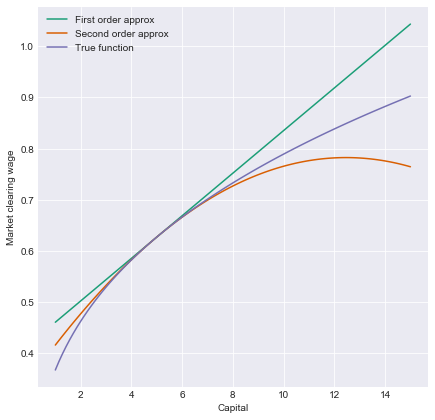

In [8]:
# Approximations
kgrid = np.linspace(1, 15, 100)

fo_app = first_approx(wage_finder_k, 5, kgrid)
so_app = second_approx(wage_finder_k, 5, kgrid)
function = np.zeros(100)
for i in range(len(kgrid)):
    function[i] = wage_finder_k(kgrid[i])

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(7, 7))
palette = plt.get_cmap('Dark2')

plt.plot(kgrid, fo_app, label='First order approx', color=palette(0))
plt.plot(kgrid, so_app, label='Second order approx', color=palette(1))
plt.plot(kgrid, function, label ='True function', color=palette(2))
plt.legend()
plt.xlabel('Capital')
plt.ylabel('Market clearing wage')

plt.show()

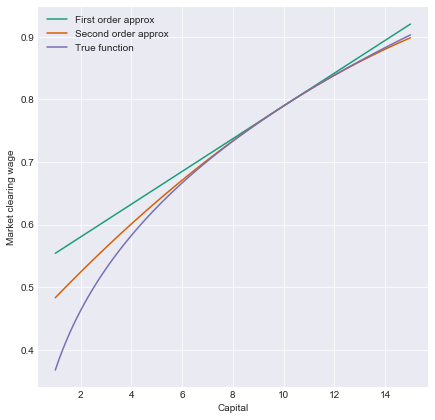

In [9]:
#Now repeat approximating around k=10...

kgrid = np.linspace(1, 15, 100)

fo_app = first_approx(wage_finder_k, 10, kgrid)
so_app = second_approx(wage_finder_k, 10, kgrid)
function = np.zeros(100)
for i in range(len(kgrid)):
    function[i] = wage_finder_k(kgrid[i])

plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(7, 7))
palette = plt.get_cmap('Dark2')

plt.plot(kgrid, fo_app, label='First order approx', color=palette(0))
plt.plot(kgrid, so_app, label='Second order approx', color=palette(1))
plt.plot(kgrid, function, label ='True function', color=palette(2))
plt.legend()
plt.xlabel('Capital')
plt.ylabel('Market clearing wage')

plt.show()

### Exercise 3

In [10]:
def F_err(y, x):
    F_err = (x**0.35 + 0.9*x - y)**(-2.5) - 0.95*(y**0.35 + 0.9*y)**(-2.5)
    return F_err

In [11]:
def first_deriv(f, x, h = 1e-2):
    return (f(x + h)- f(x - h))/(2*h)
    
def second_deriv(f, x, h = 1e-2):
    return (f(x + h)+ f(x - h) - 2*f(x))/(h**2)

def third_deriv(f, x, h = 1e-2):
    return (f(x + 2*h) - 2 * f(x + h) + 2 * f(x - h) - f(x - 2*h))/(2*(h**3))

def first_approx(f, x0, x):
     return f(x0) + first_deriv(f, x0)*(x - x0) 
    
def second_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2

def third_approx(f, x0, x):
    return f(x0) + first_deriv(f, x0)*(x - x0) + 0.5* second_deriv(f,x0)*(x - x0) ** 2 + \
            1/6* third_deriv(f,x0)*(x - x0) ** 3

def y_finder(x):
    y = opt.fsolve(F_err, 50, x, xtol=1e-8)
    return y

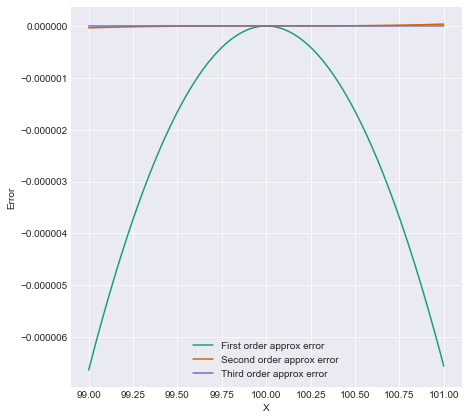

In [12]:
# Approximations
xgrid = np.linspace(99, 101, 100)

fo_app_x = first_approx(y_finder, 100, xgrid)
so_app_x = second_approx(y_finder, 100, xgrid)
tho_app_x = third_approx(y_finder, 100, xgrid)
function_x = np.zeros(100)
for i in range(len(xgrid)):
    function_x[i] = y_finder(xgrid[i])

fo_err = function_x - fo_app_x
so_err = function_x - so_app_x
tho_err = function_x - tho_app_x
    
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(7, 7))
palette = plt.get_cmap('Dark2')

plt.plot(xgrid, fo_err, label='First order approx error', color=palette(0))
plt.plot(xgrid, so_err, label='Second order approx error', color=palette(1))
plt.plot(xgrid, tho_err, label ='Third order approx error', color=palette(2))
plt.legend()
plt.xlabel('X')
plt.ylabel('Error')

plt.show()

### Exercise 4 and 5

In [15]:
import dolo

In [16]:
fname = "BM.yaml"
mod = dolo.yaml_import(fname)
mod.residuals()

OrderedDict([('transition', array([0., 0.])), ('arbitrage', array([0.]))])

In [17]:
print(mod) # residuals should be zero since we inputted steady state values


Model:
------
name: "BaselineModel"
type: "dtcscc"
file: "BM.yaml

Equations:
----------

transition
 1  : 0.0000 : k = i(-1)
 2  : 0.0000 : z = rho_z*z(-1) + e_z

arbitrage
 1  : 0.0000 : 1 - beta*(c/c(1))*(rk(1))   | 0.0 <= i <= inf




In [18]:
dr_pert = dolo.algos.dtcscc.perturbations.perturbate(mod)

AttributeError: module 'dolo.algos.dtcscc' has no attribute 'perturbations'

In [19]:
#This would work if dolo code wasn't all commented out!